# Finetuned Language Models are Zero-shot Learners

## Abstract：
本文探讨了一种提高语言模型零样本学习能力的简单方法，名为instruction tuning，它在数据集集合上微调语言模型，从而大大提高了unseen 任务上的零样本性能。
##### 重点：
* instruction tuning
  
* unseen 任务

## Instruction Tuning：
### Tuning:
#### 意义：
* 大模型训练成本高，所以通过在完善模型的基础上训练，可以得到专攻某个方向的模型
  
* 原模型可能存在模型不收敛，参数不够优化，准确率低，模型泛化能力低，容易过拟合等风险，通过tuning，改善这些问题

#### 方式：
* 全量微调FFT(Full Fine Tuning)：一条是对全量的参数，进行全量的训练
  
* PEFT(Parameter-Efficient Fine Tuning)：一条是只对部分的参数进行训练
  
##### 参考：
https://zhuanlan.zhihu.com/p/650287173

<style>
  p{
    line-height: 1.6
  }
</style>
### Instrucion Tuning 在本文的使用：
#### 作用：对一系列表述为instructions的任务进行tuning，从而提升模型
Instruction tuning finetunes a pretrained language model on a mixture of tasks phrased as instructions   

#### 实现：
* 图示：  

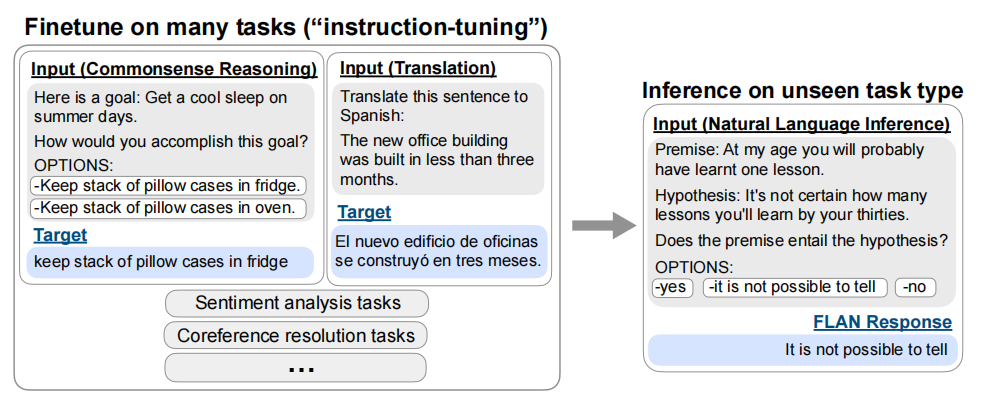
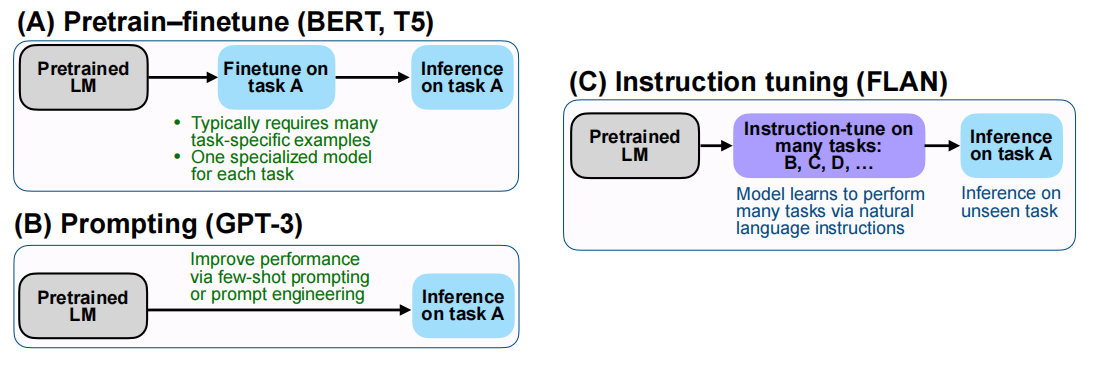

* **通过在除了 unseen 任务（如图中的nli）的其它nlp任务上进行 instruction tuning，使模型具有处理 unseen 任务的能力**   
  
* 本文的想法是，通过监督来教LM执行instructions描述的任务，从而使它将学习到如何遵循instructions，当面对unseen的任务时，模型自然而然地就会遵循instruction做出响应。
  
* 为了评估模型在unseen任务上的性能，本文的思路是根据任务类型将数据集分组为集群，并保留每个任务集群进行评估，然后对所有剩余集群进行instruction tuning。

#### Tasks & Template：
* 本问对任务的分类: **每个数据集被分到12个任务群中的一个，其中给定群中的数据集具有相同的任务类型**   
  
  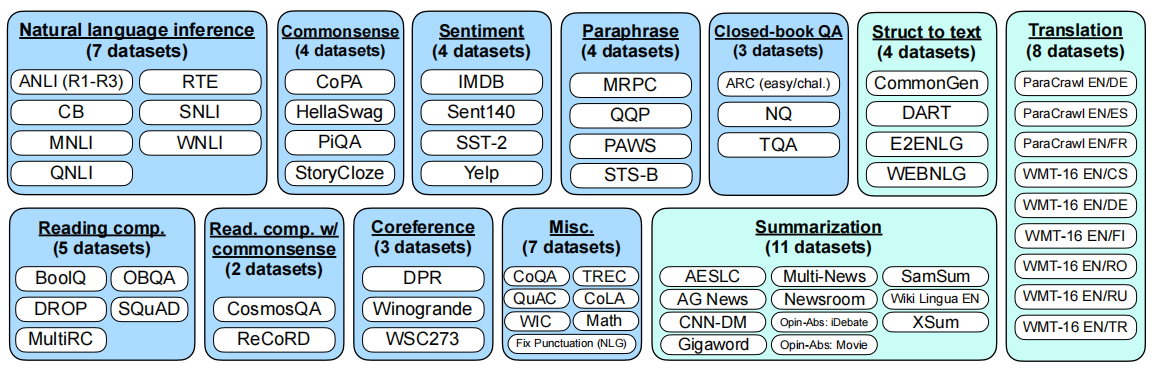   
* **对于每个数据集，本文手工构建了10个独特的模板，这些模板使用自然语言instructions 来描述该数据集的任务。这10个模板中的大多数描述了原始任务，但为了增加多样性，对于每个数据集，还包括最多三个“turned the task around”的模板（例如，对于情感分类，要求生成电影评论的模板）**

* 例：一个自然语言推理数据集的多个instruction templates:   

  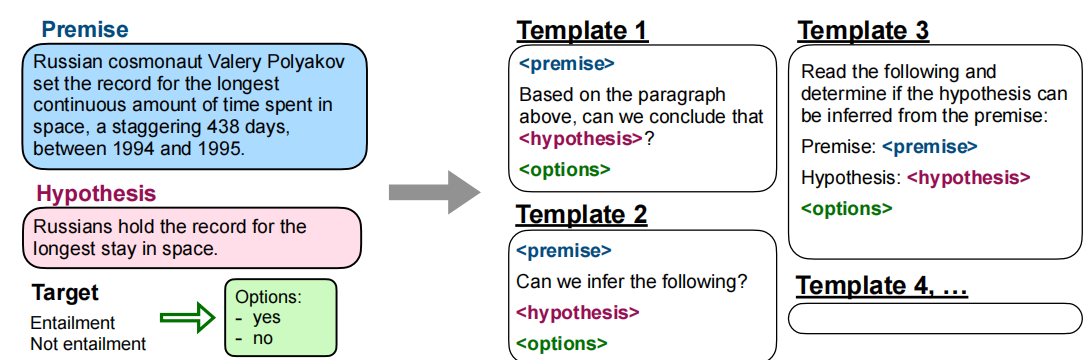

* <p>Evaluation Splits：在确定 unseen task 后，选择要 tuning 的数据集：   
  虽然之前的一些工作通过不允许同一数据集在训练中出现来定义unseen的任务，但本文使用了一个更保守的定义，它利用了所谓的任务集群。例：如果数据集D作为unseen task进行评估，而D属于NLI任务，那么所有NLI中的数据集都不能再instruction tune中出现。</p>
  

<style>
  p{
    line-height: 2.0
  }
</style>
## 实验：
<p>
本文从自然语言推理、阅读理解、闭卷问答、翻译、常识推理、共指消解和文本结构等方面对FLAN进行评估。按照上文描述的定义，本文把数据集按照所涉及的领域分为cluster，并分别将每个cluster设置为unseen task进行评估。对于每个数据集，本文对十个template都做了测试，并求出结果的平均值和标准差。这代表了所谓“典型”的natural language instruction的预期性能。同时也保留了其中的最优结果。
</p>

#### 总结：
<p>
总的来说，可以观察到，instruction tuning对于自然表述为指令的任务（例如NLI、QA、翻译、结构到文本）非常有效，而对于直接表述为语言建模的任务（其中instructions在很大程度上是冗余的）则不太有效（例如，常识推理和共指消解任务，格式为完成一个不完整的句子或段落）
</p>

##### Zero-Shot 结果（NLI、阅读理解、闭卷QA、和翻译）：
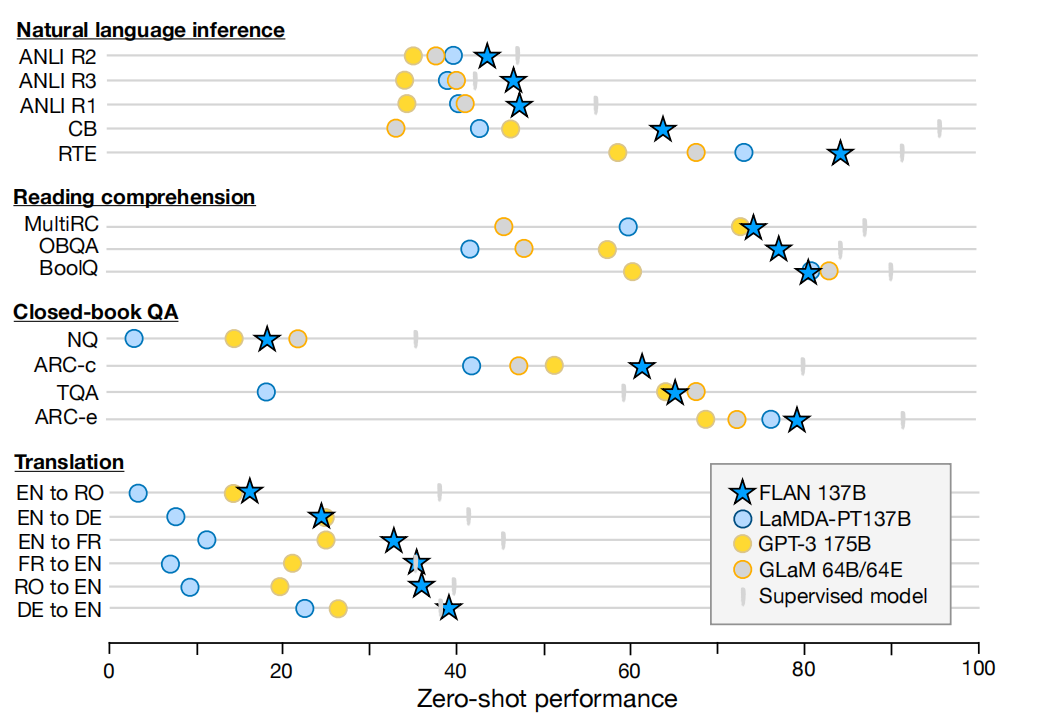

## Ablation Study：
### cluster和task数量对instruction tuning性能的影响
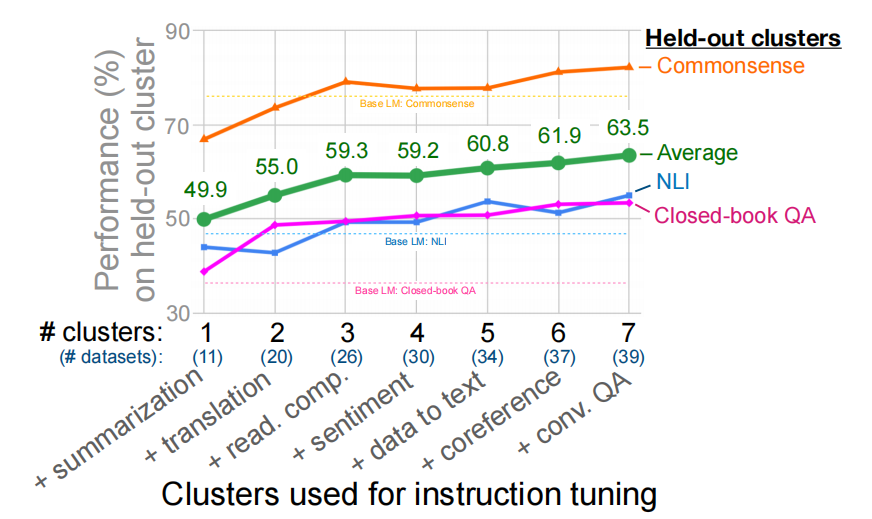   
<br/>

**可以看到，cluster数量越多，tuning的效果越好，同时并没有看到增长的上限，这意味着当不断地增加cluster数量时，模型可能会达到更好的效果**

<br/>
<br/>

### 模型大小对instruction tuning性能的影响：
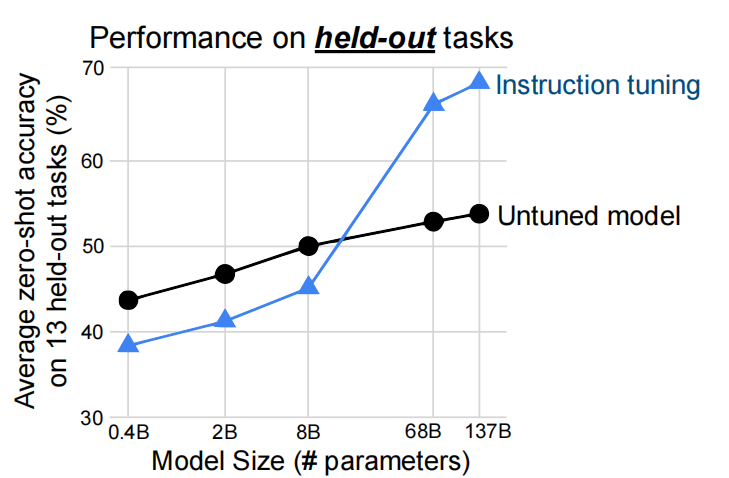   
<br/>

**可以看到，和不做tuning的模型比，当参数量高时，instruction tuning可以达到更好的效果，这也和本文主实验的结果相印证，但是，对于较小的模型，instruction tuning反而降低了模型的性能。一种可能的解释是，学习instruction tuning中的内容已经占据了模型的整个容量，使其在面对新任务时表现不佳。而大容量的模型在做tuning的同时，还有余量学习如何听从instruction，这让他们在面对新任务时取得更好的效果**

<br/>
<br/>

### role of instructions：
<style>
  p{
    line-height: 2.0
  }
</style>
<p>
研究的是instruction本身的设定对tuning起着怎样的作用。因为有一种可能是，由于cluster的堆积，fine-tuning过程不需要instruction的设计也能达到很好的效果。由此，本文设计了两种fine-tuning模式，他们都不带有instruction。一种叫做no template设定，只提供给模型输入和输出。另一种叫做dataset name设定，它在输入前面拼接上task和数据集名称。对比结果如下图所示
</p>
<br/>

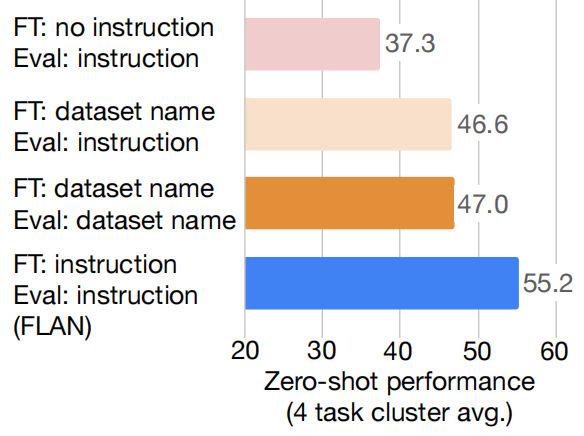

<br/>

**两种消融设置的性能都比 FLAN 差得多，这表明使用instruction进行训练对于在未见过的任务上的零样本性能至关重要**

